In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.rcParams['figure.dpi']=300

In [2]:
adata = sc.read_h5ad('sce_ZF_sampleIntegration_2022-02-02_noCounts.h5ad')

In [3]:
adata.obs

,cell,Sample,Barcode,Tissue,condition,post.surgery,cluster_k50,cluster_k100,cluster_k150,cluster_k200,...,EpiCardMix_kk50,M0Only_k10,M0Only_k20,M0Only_k50,M0_k50_cl9.15k10,M0_k50_cl9.15k20,M0_k50_cl9.15k50,EpiCardMix_kk10.y,EpiCardMix_kk20.y,EpiCardMix_kk50.y
AAACCCAAGAGGGCGA_1dpi.Heart.1,AAACCCAAGAGGGCGA_1dpi.Heart.1,1dpi-Heart-1,AAACCCAAGAGGGCGA-1,Heart,injury,dpi1,2,14,4,13,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AAACCCAAGGCTCCCA_1dpi.Heart.1,AAACCCAAGGCTCCCA_1dpi.Heart.1,1dpi-Heart-1,AAACCCAAGGCTCCCA-1,Heart,injury,dpi1,2,14,4,13,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AAACCCACAATGCAGG_1dpi.Heart.1,AAACCCACAATGCAGG_1dpi.Heart.1,1dpi-Heart-1,AAACCCACAATGCAGG-1,Heart,injury,dpi1,11,9,9,7,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AAACCCACATCCTTCG_1dpi.Heart.1,AAACCCACATCCTTCG_1dpi.Heart.1,1dpi-Heart-1,AAACCCACATCCTTCG-1,Heart,injury,dpi1,15,8,8,5,...,NA,NA,NA,NA,10,4,4,NA,NA,NA
AAACCCATCCCTCTCC_1dpi.Heart.1,AAACCCATCCCTCTCC_1dpi.Heart.1,1dpi-Heart-1,AAACCCATCCCTCTCC-1,Heart,injury,dpi1,2,14,4,13,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ctrl-WKM-2TTTGGTTCACACACGC,Ctrl-WKM-2TTTGGTTCACACACGC,Ctrl-WKM-2,TTTGGTTCACACACGC-1,WKM,ctrl,ctrl,9,8,8,5,...,NA,NA,NA,NA,11,1,1,NA,NA,NA
Ctrl-WKM-2TTTGGTTCATTGTACG,Ctrl-WKM-2TTTGGTTCATTGTACG,Ctrl-WKM-2,TTTGGTTCATTGTACG-1,WKM,ctrl,ctrl,4,4,5,11,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Ctrl-WKM-2TTTGTTGAGGGTAGCT,Ctrl-WKM-2TTTGTTGAGGGTAGCT,Ctrl-WKM-2,TTTGTTGAGGGTAGCT-1,WKM,ctrl,ctrl,4,4,5,11,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Ctrl-WKM-2TTTGTTGCACCCAACG,Ctrl-WKM-2TTTGTTGCACCCAACG,Ctrl-WKM-2,TTTGTTGCACCCAACG-1,WKM,ctrl,ctrl,9,8,8,5,...,NA,NA,NA,NA,13,1,1,NA,NA,NA


['Heart' 'Liver' 'Pancreas' 'WKM']


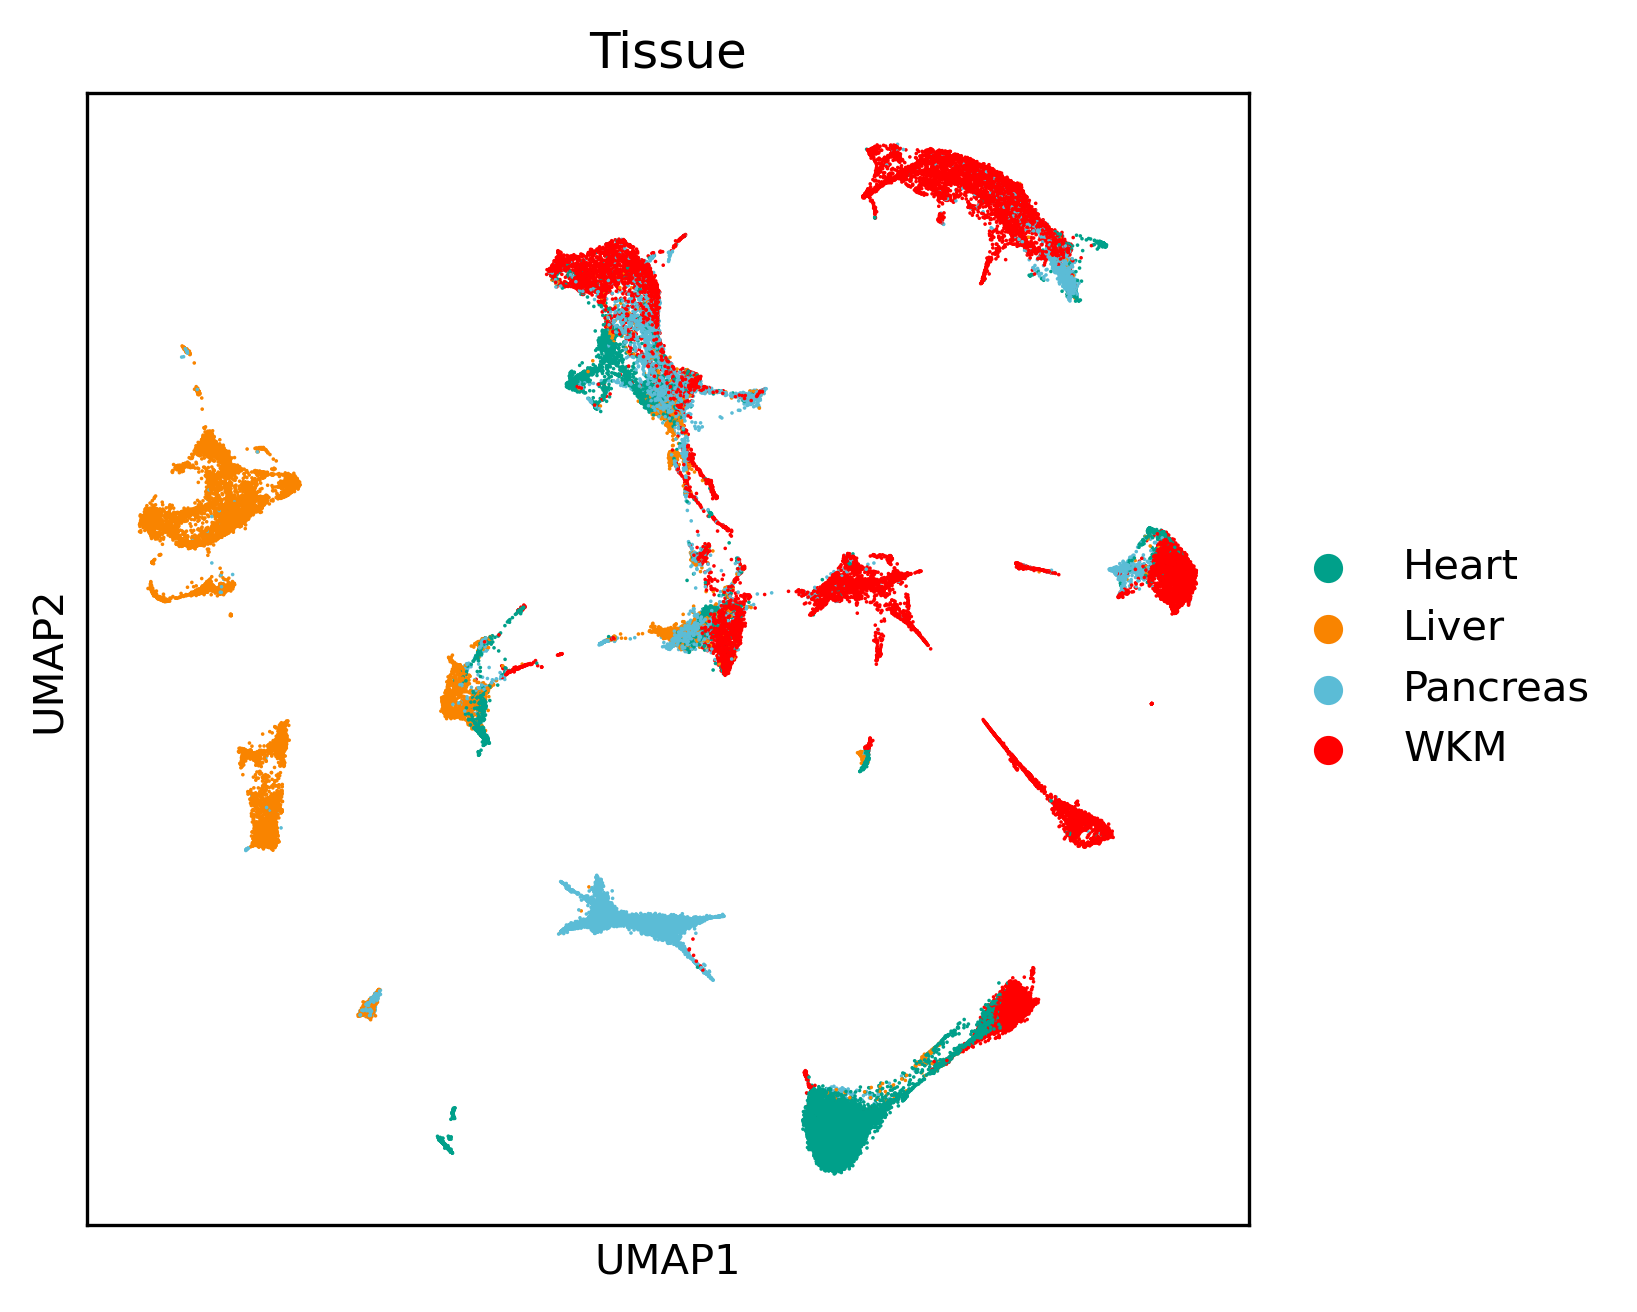

In [4]:
categories = np.unique(adata.obs['Tissue'])
print(categories)
colors = {'Heart': '#00A08A', 'Liver': '#F98400', 'Pancreas': '#5BBCD6', 'WKM': '#FF0000'}
fig, ax = plt.subplots(figsize=(5,5))
sc.pl.umap(adata, color='Tissue', palette=colors, ax=ax, size=3)


/Users/pz/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'group' as categorical


['Acinar cell' 'B cell' 'CM' 'Cholangiocyte' 'Erythrocyte'
 'HPC/HSC kidney' 'Hepatocyte' 'Macrophage/Monocyte' 'Mixed' 'NK/T'
 'Neutrophil' 'Thrombocyte']


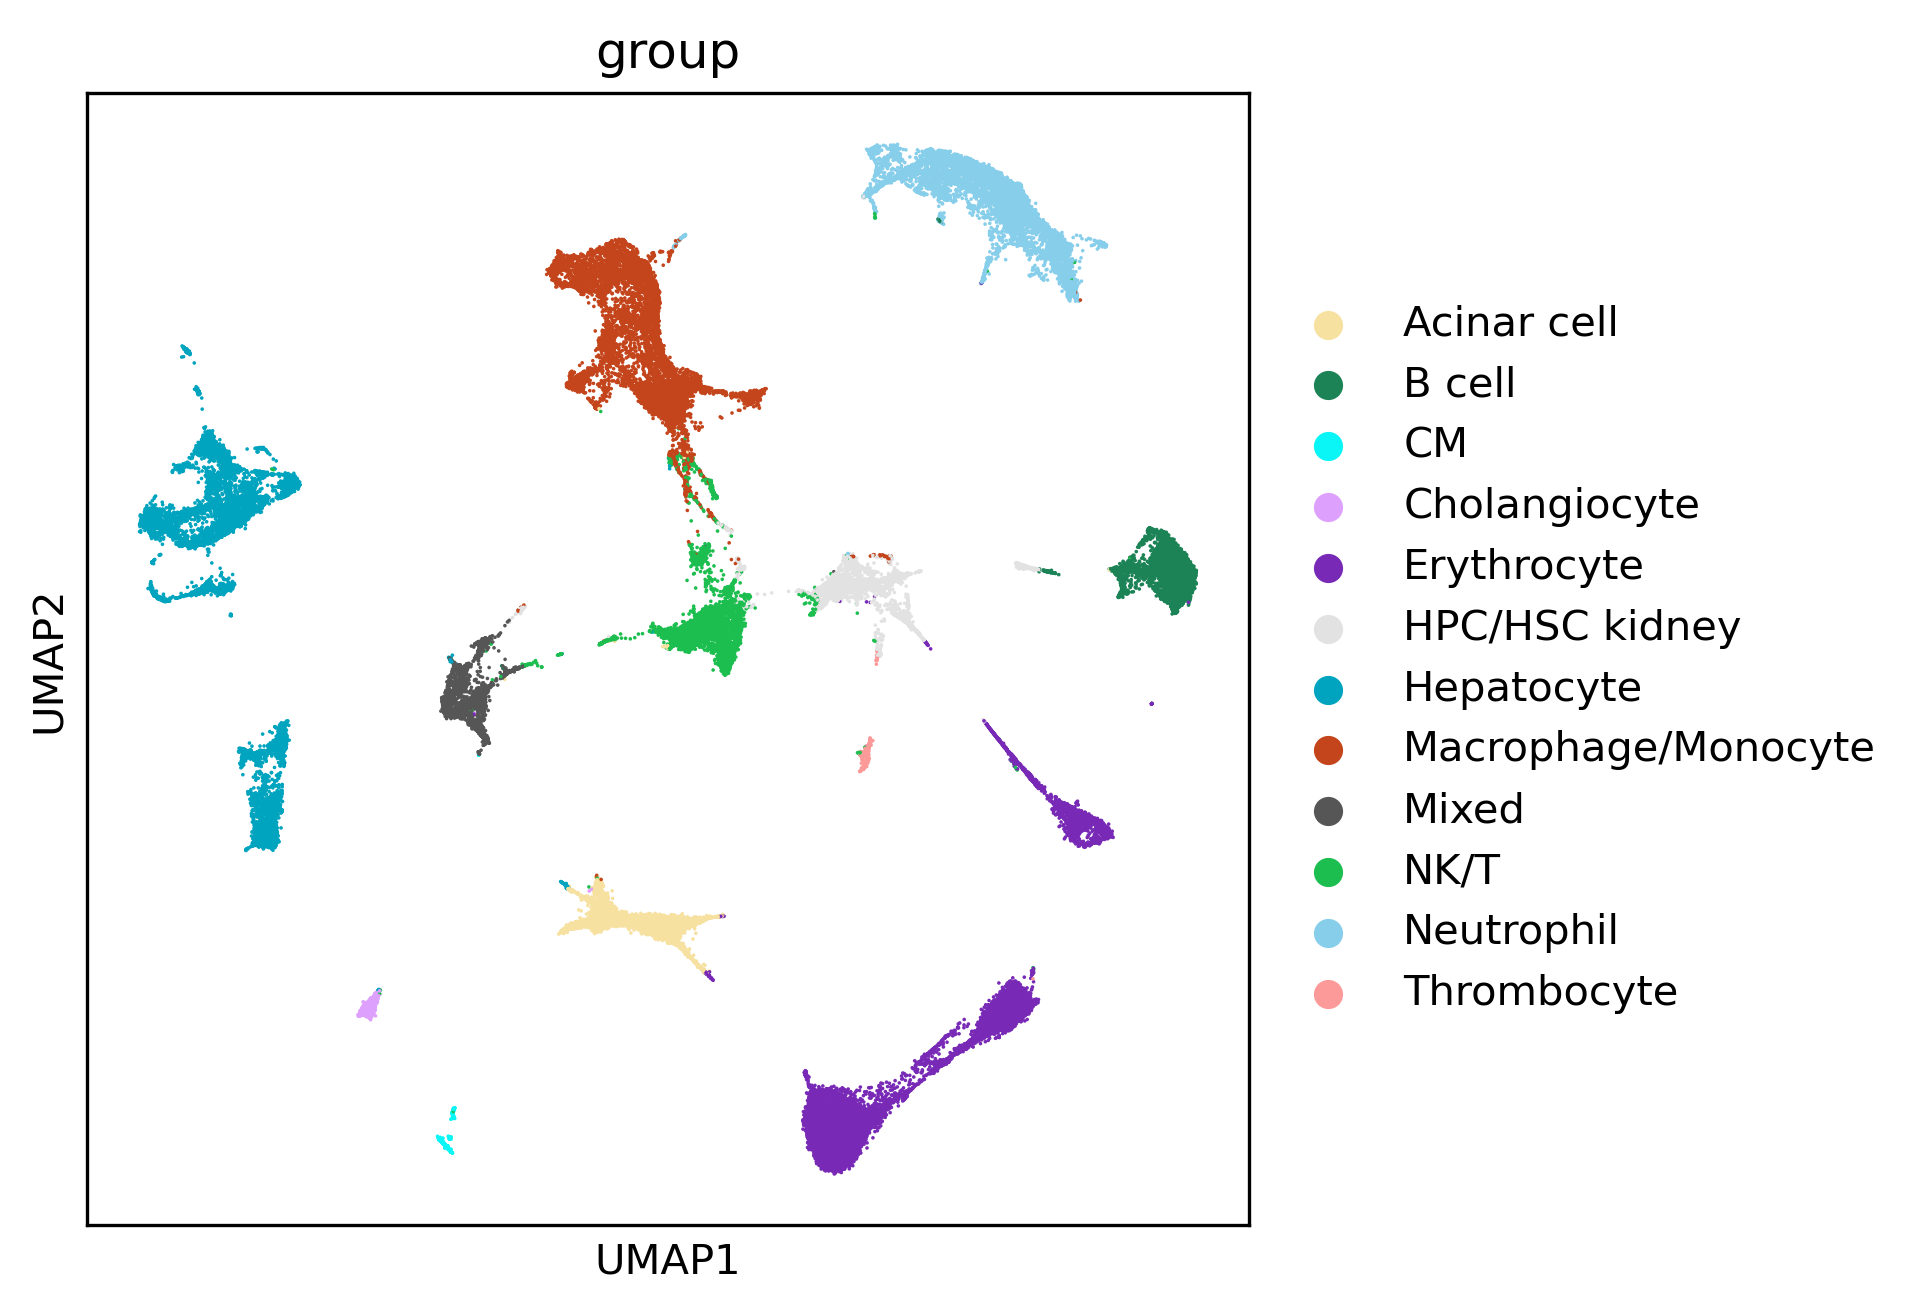

In [5]:
cluster_to_group = {
    8: "Hepatocyte",
    13: "Hepatocyte",
    9: "Macrophage/Monocyte",
    15: "Macrophage/Monocyte",
    11: "Neutrophil",
    4: "B cell",
    3: "HPC/HSC kidney",
    7: "NK/T",
    5: "Mixed",
    16: "Acinar cell",
    12: "Cholangiocyte",
    1: "CM",
    2: "Erythrocyte",
    6: "Erythrocyte",
    10: "Erythrocyte",
    14: "Thrombocyte"
}
adata.obs['group'] = [cluster_to_group.get(int(cluster), cluster_to_group.get(cluster, "Unknown")) for cluster in adata.obs['cluster_k50']]
categories = np.unique(adata.obs['group'])
print(categories)

colors = {
    "Hepatocyte": '#00A4BF',#Hepatocytes
    "Macrophage/Monocyte": '#C4451C',#myloid 
    "Neutrophil": '#87CEEB',
    "B cell": '#1C8356',
    "HPC/HSC kidney": '#E2E2E2',
    "NK/T": '#1CBE4F',
    "Mixed": '#565656',
    "Acinar cell": '#F7E1A0', # ancreatic cells
    "Cholangiocyte": '#DEA0FD',
    "CM": '#0af5f5',
    "Erythrocyte": '#782AB6',
    "Thrombocyte": '#FB9A99',
    "Unknown": '#808080'  # Default color for unknown groups
}

fig, ax = plt.subplots(figsize=(5,5))
sc.pl.umap(adata, color='group', ax=ax, size=3, palette=colors)



['ctrl' 'dpi1' 'dpi7']


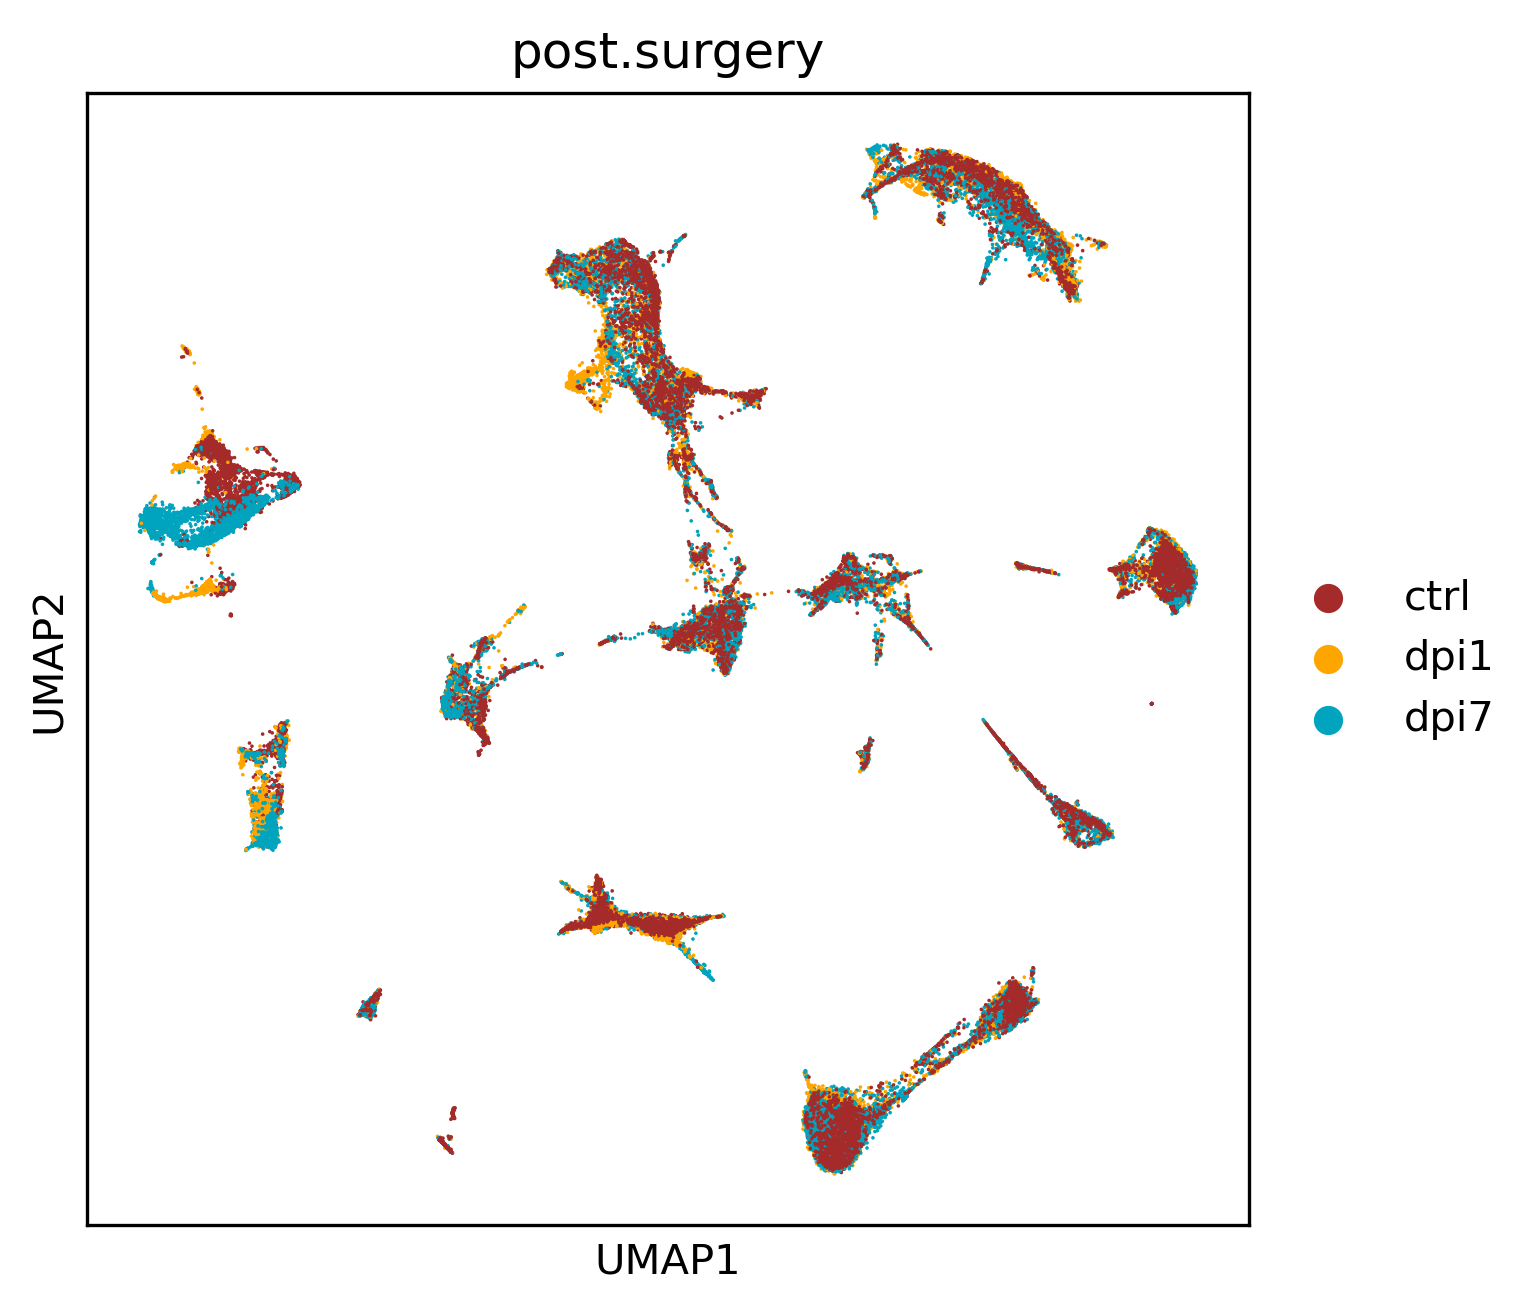

In [6]:
categories = np.unique(adata.obs['post.surgery'])
print(categories)
colors = {'ctrl': '#A52A2A', 'dpi1': '#FFA500', 'dpi7': '#00A4BF'}
fig, ax = plt.subplots(figsize=(5,5))
sc.pl.umap(adata, color='post.surgery', palette=colors, ax=ax, size=3)